# The Sparks Foundation- GRIP- Data Science and Business Analytics Intern- October-2021 batch

Author :- Anand Bhausaheb Kharabe

Task 6 :- Prediction using Decision Tree Algorithm

Level :- Intermediate

Language :- Python

Software :- Jupyter Notebook

DataSet link :- https://bit.ly/3kXTdox

Problem Statement :- Create a Decision tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import klib
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [3]:
t6 = pd.read_csv('iris.csv')
t6

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
t6.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
t6.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
t6=t6.drop("Id", axis=1)

In [8]:
t6.shape

(150, 5)

In [9]:
t6.info() # Gives summary of Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
t6.isna().sum() # Check the dataset whether its contain null value or not

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
t6.describe() # Display statistical Details

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
pd.DataFrame(t6.Species).value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Datavisualization & Correlation Matrix

In [12]:
 correlation = t6.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

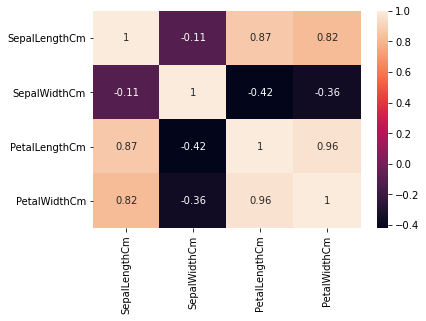

In [14]:
sns.heatmap(correlation,annot=True)

Text(0.5, 1.0, 'General Statistics of Iris dataset')

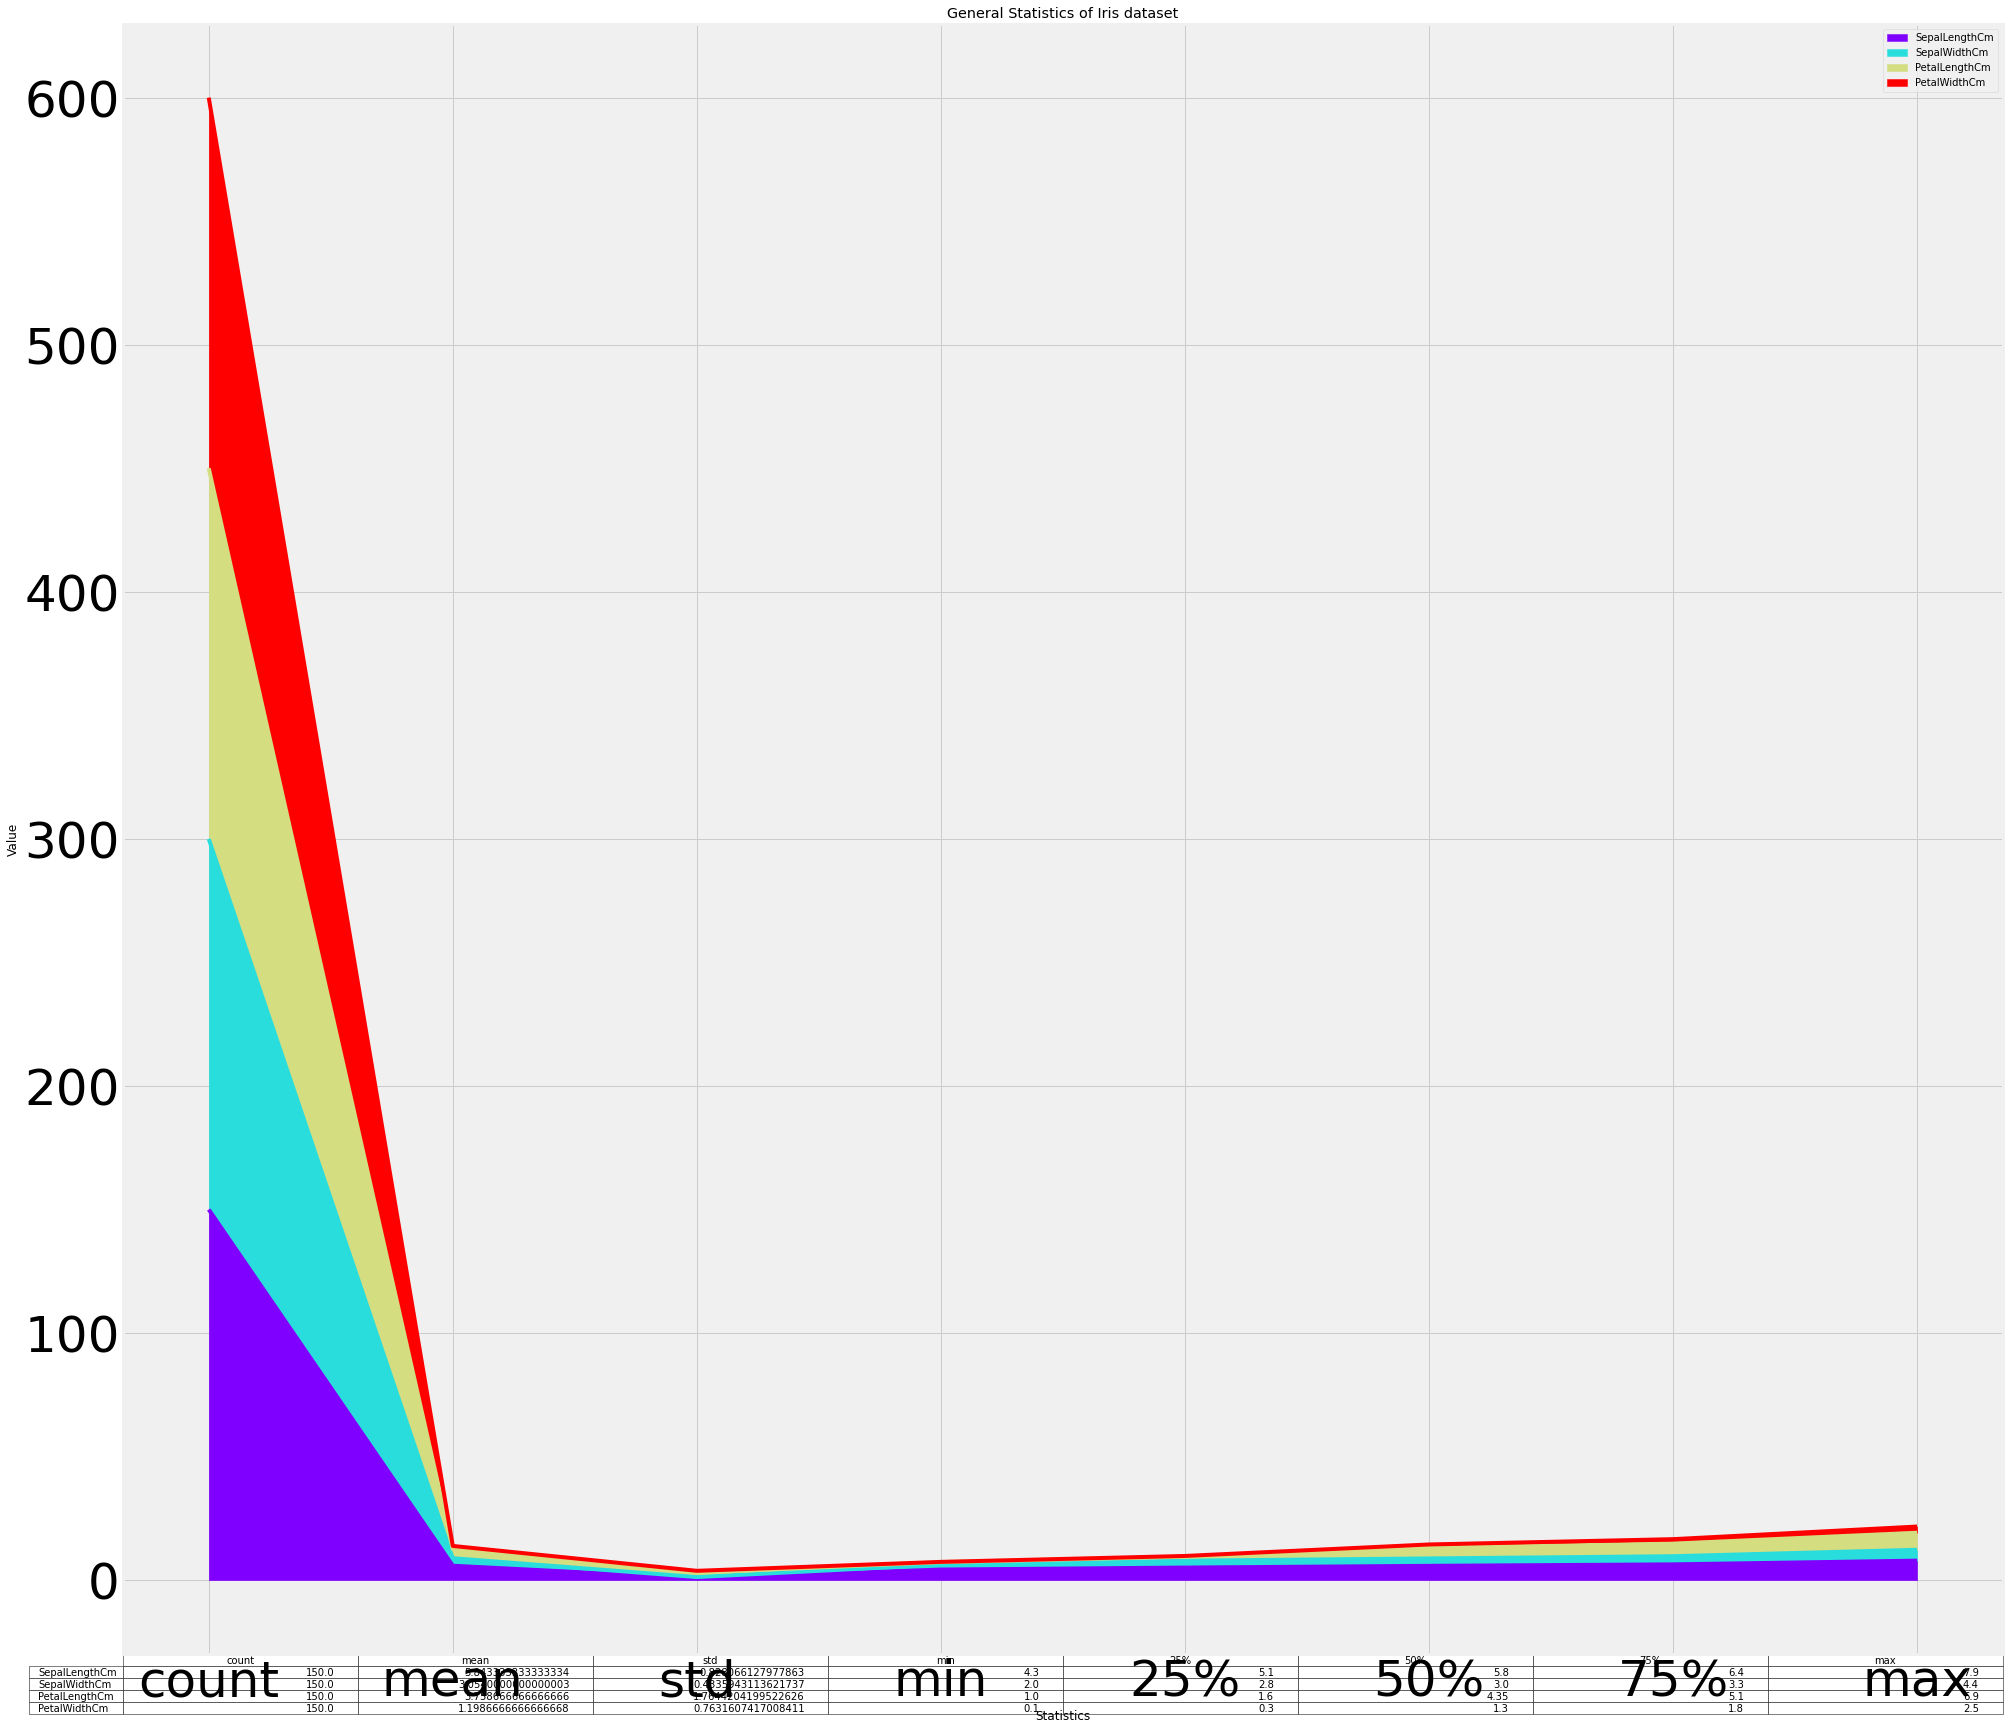

In [47]:
t6.describe().plot(kind = "area",fontsize=50, figsize = (30,30), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris dataset")

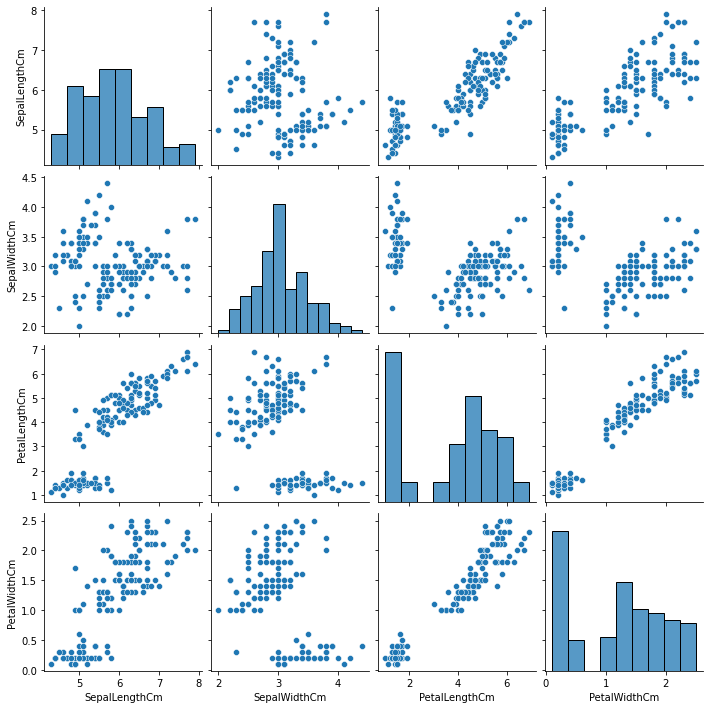

In [15]:
sns.pairplot(t6)

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

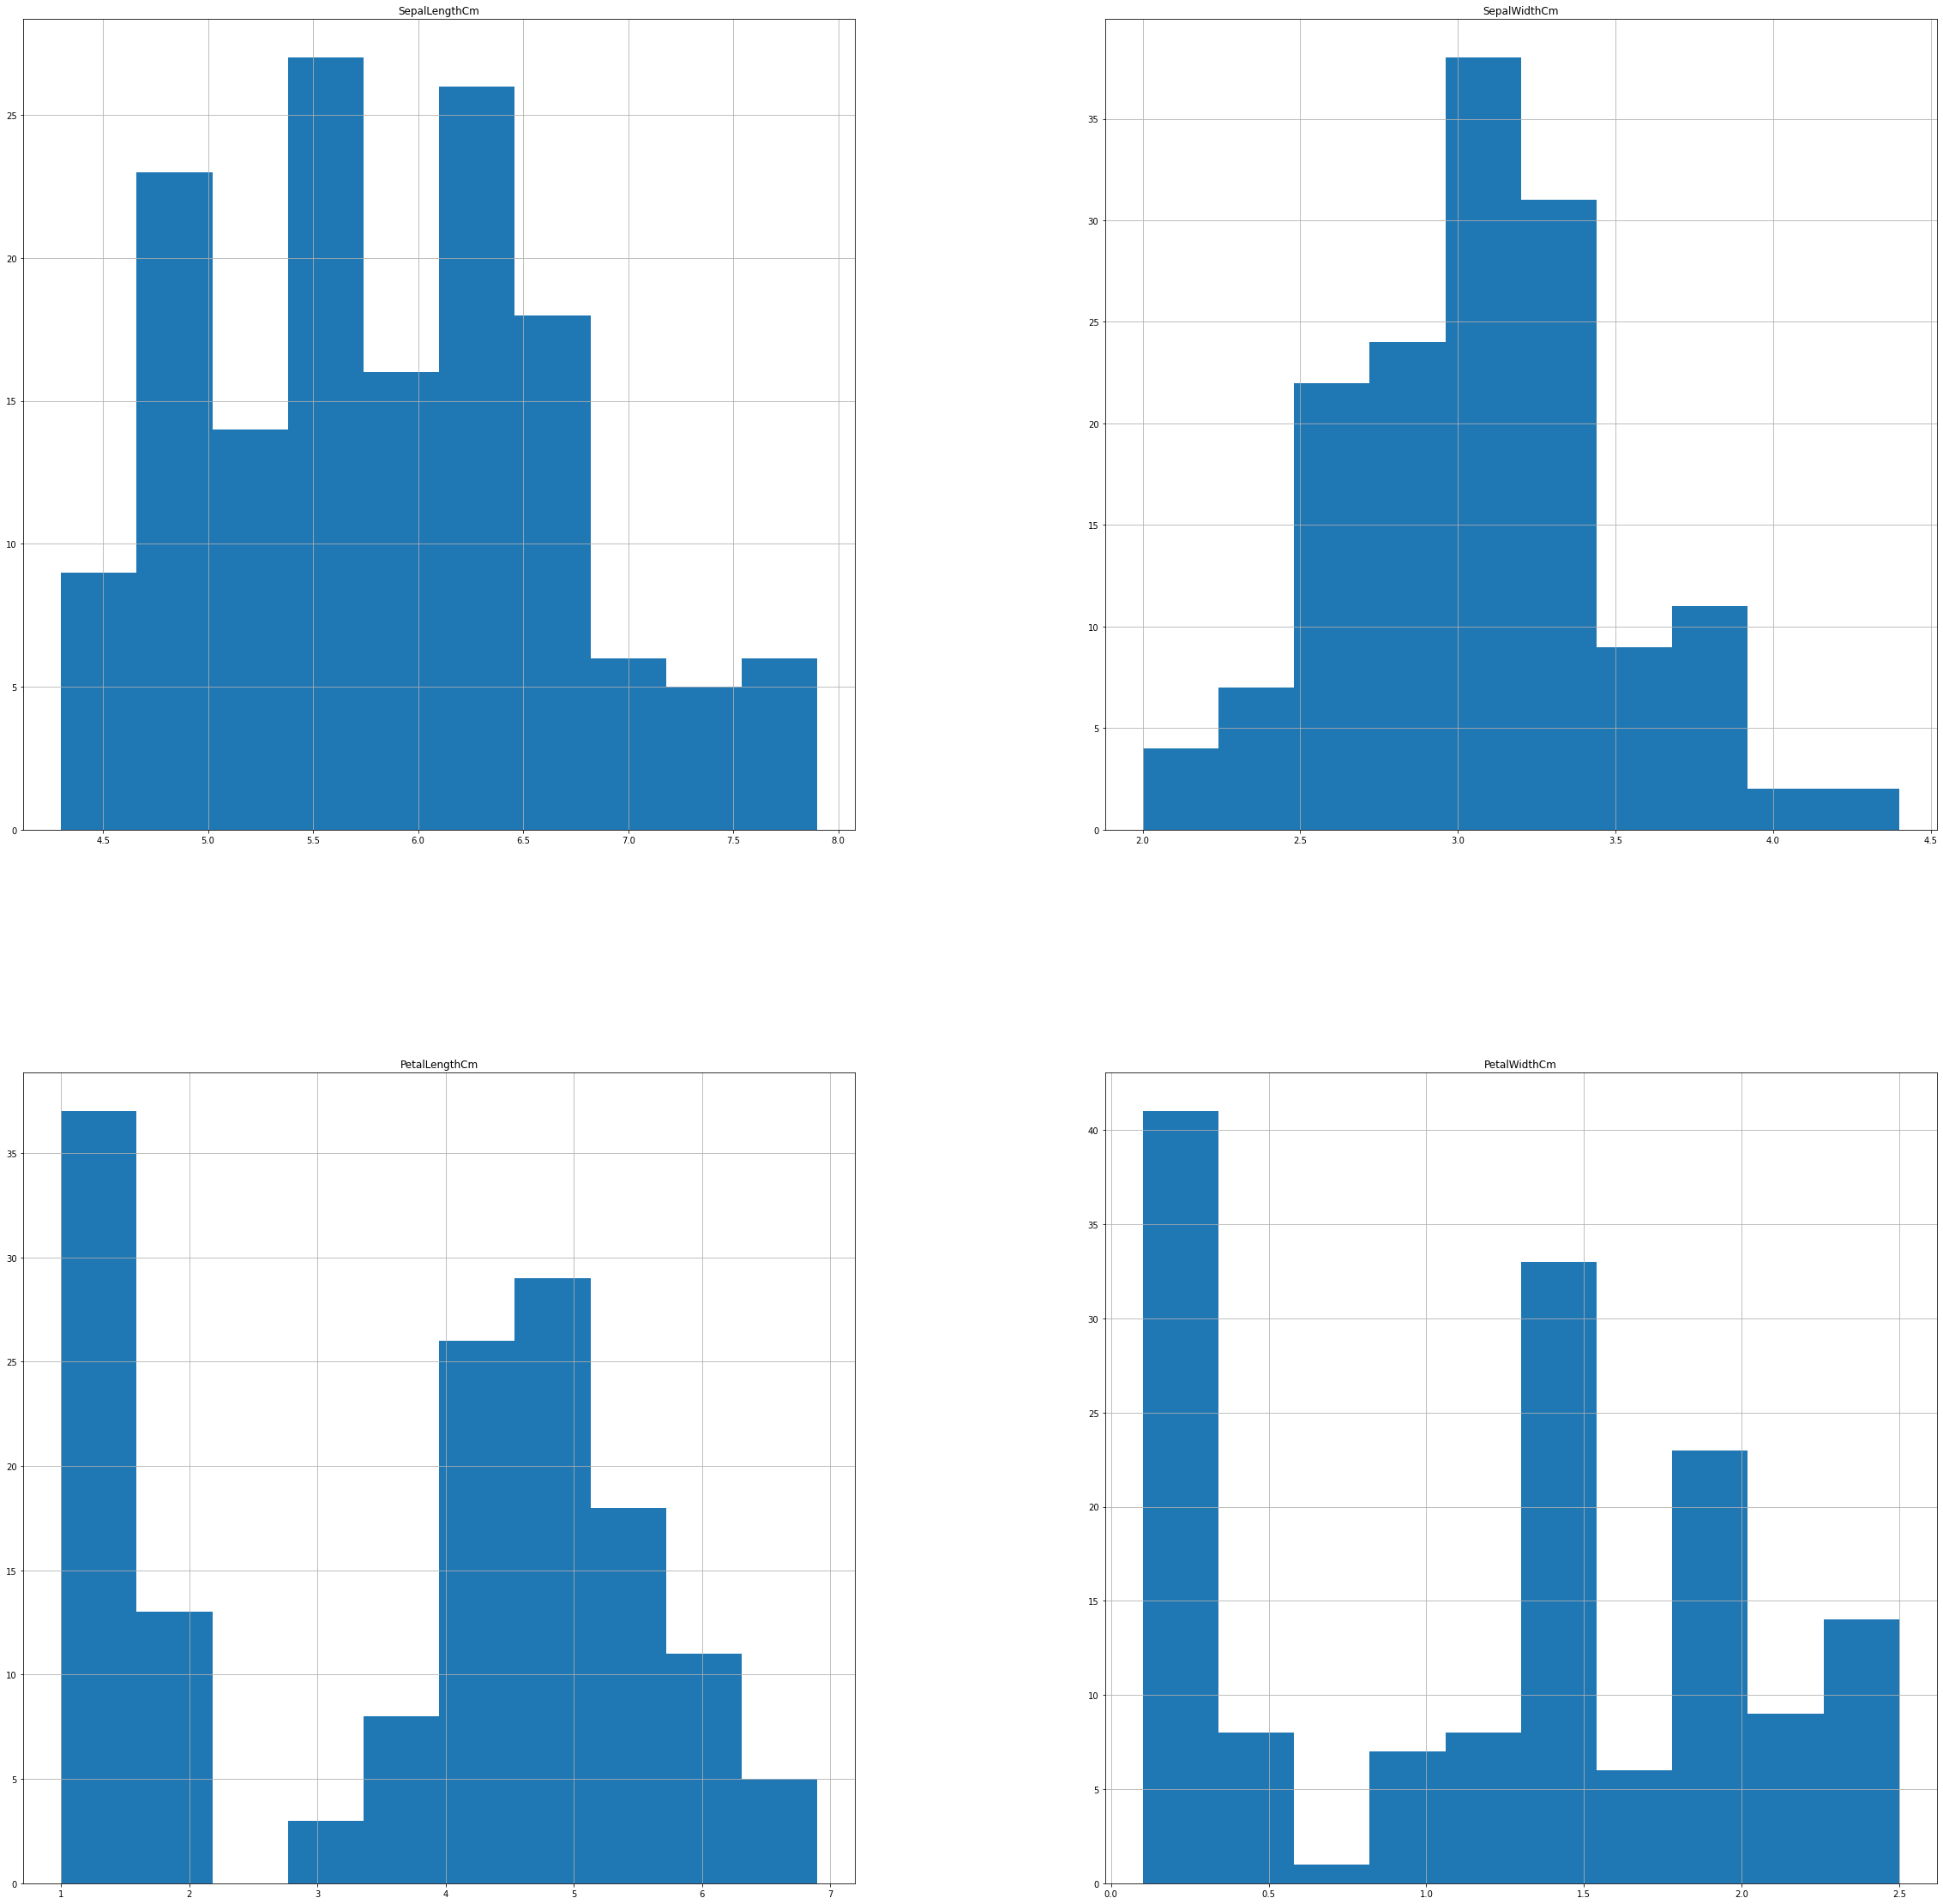

In [17]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
t6.hist(ax = ax)

<AxesSubplot:xlabel='Species', ylabel='count'>

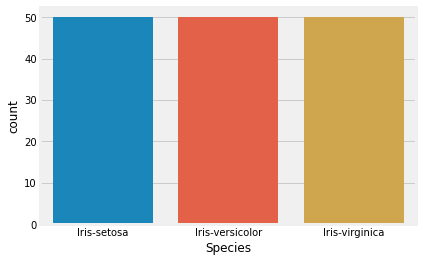

In [49]:
sns.countplot('Species',data=t6)

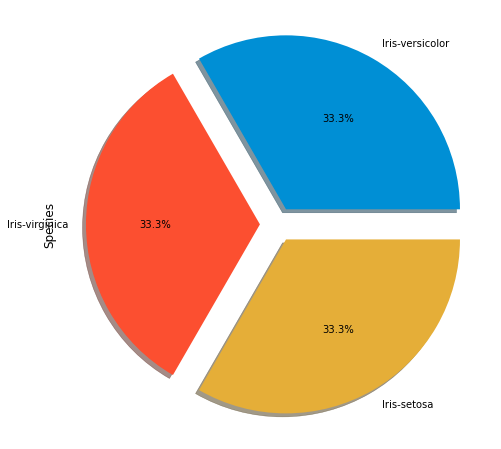

In [51]:
t6['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

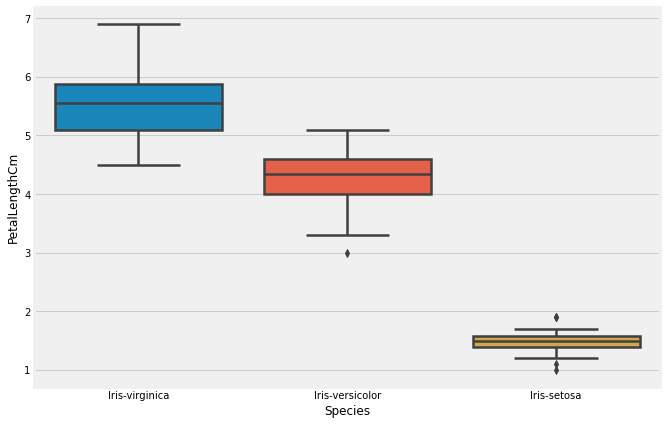

In [61]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=t6,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

# Spliting the dataset as X = independent variable and y = dependent variable 

In [62]:
X=t6.iloc[:,[0,1,2,3]]
y=t6.Species

In [63]:
X.shape

(150, 4)

In [64]:
y.shape

(150,)

# Train-Test-Split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [78]:
X_train.shape

(120, 4)

In [79]:
X_test.shape

(30, 4)

# Creating Decision Tree Model

In [73]:

t6_clf = DecisionTreeClassifier(max_depth = 5)
t6_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [74]:
y_pred_train = t6_clf.predict(X_train)
y_pred_test = t6_clf.predict(X_test)

In [75]:
accuracy_score(y_train, y_pred_train)

0.9916666666666667

In [76]:
accuracy_score(y_test, y_pred_test)

0.9666666666666667

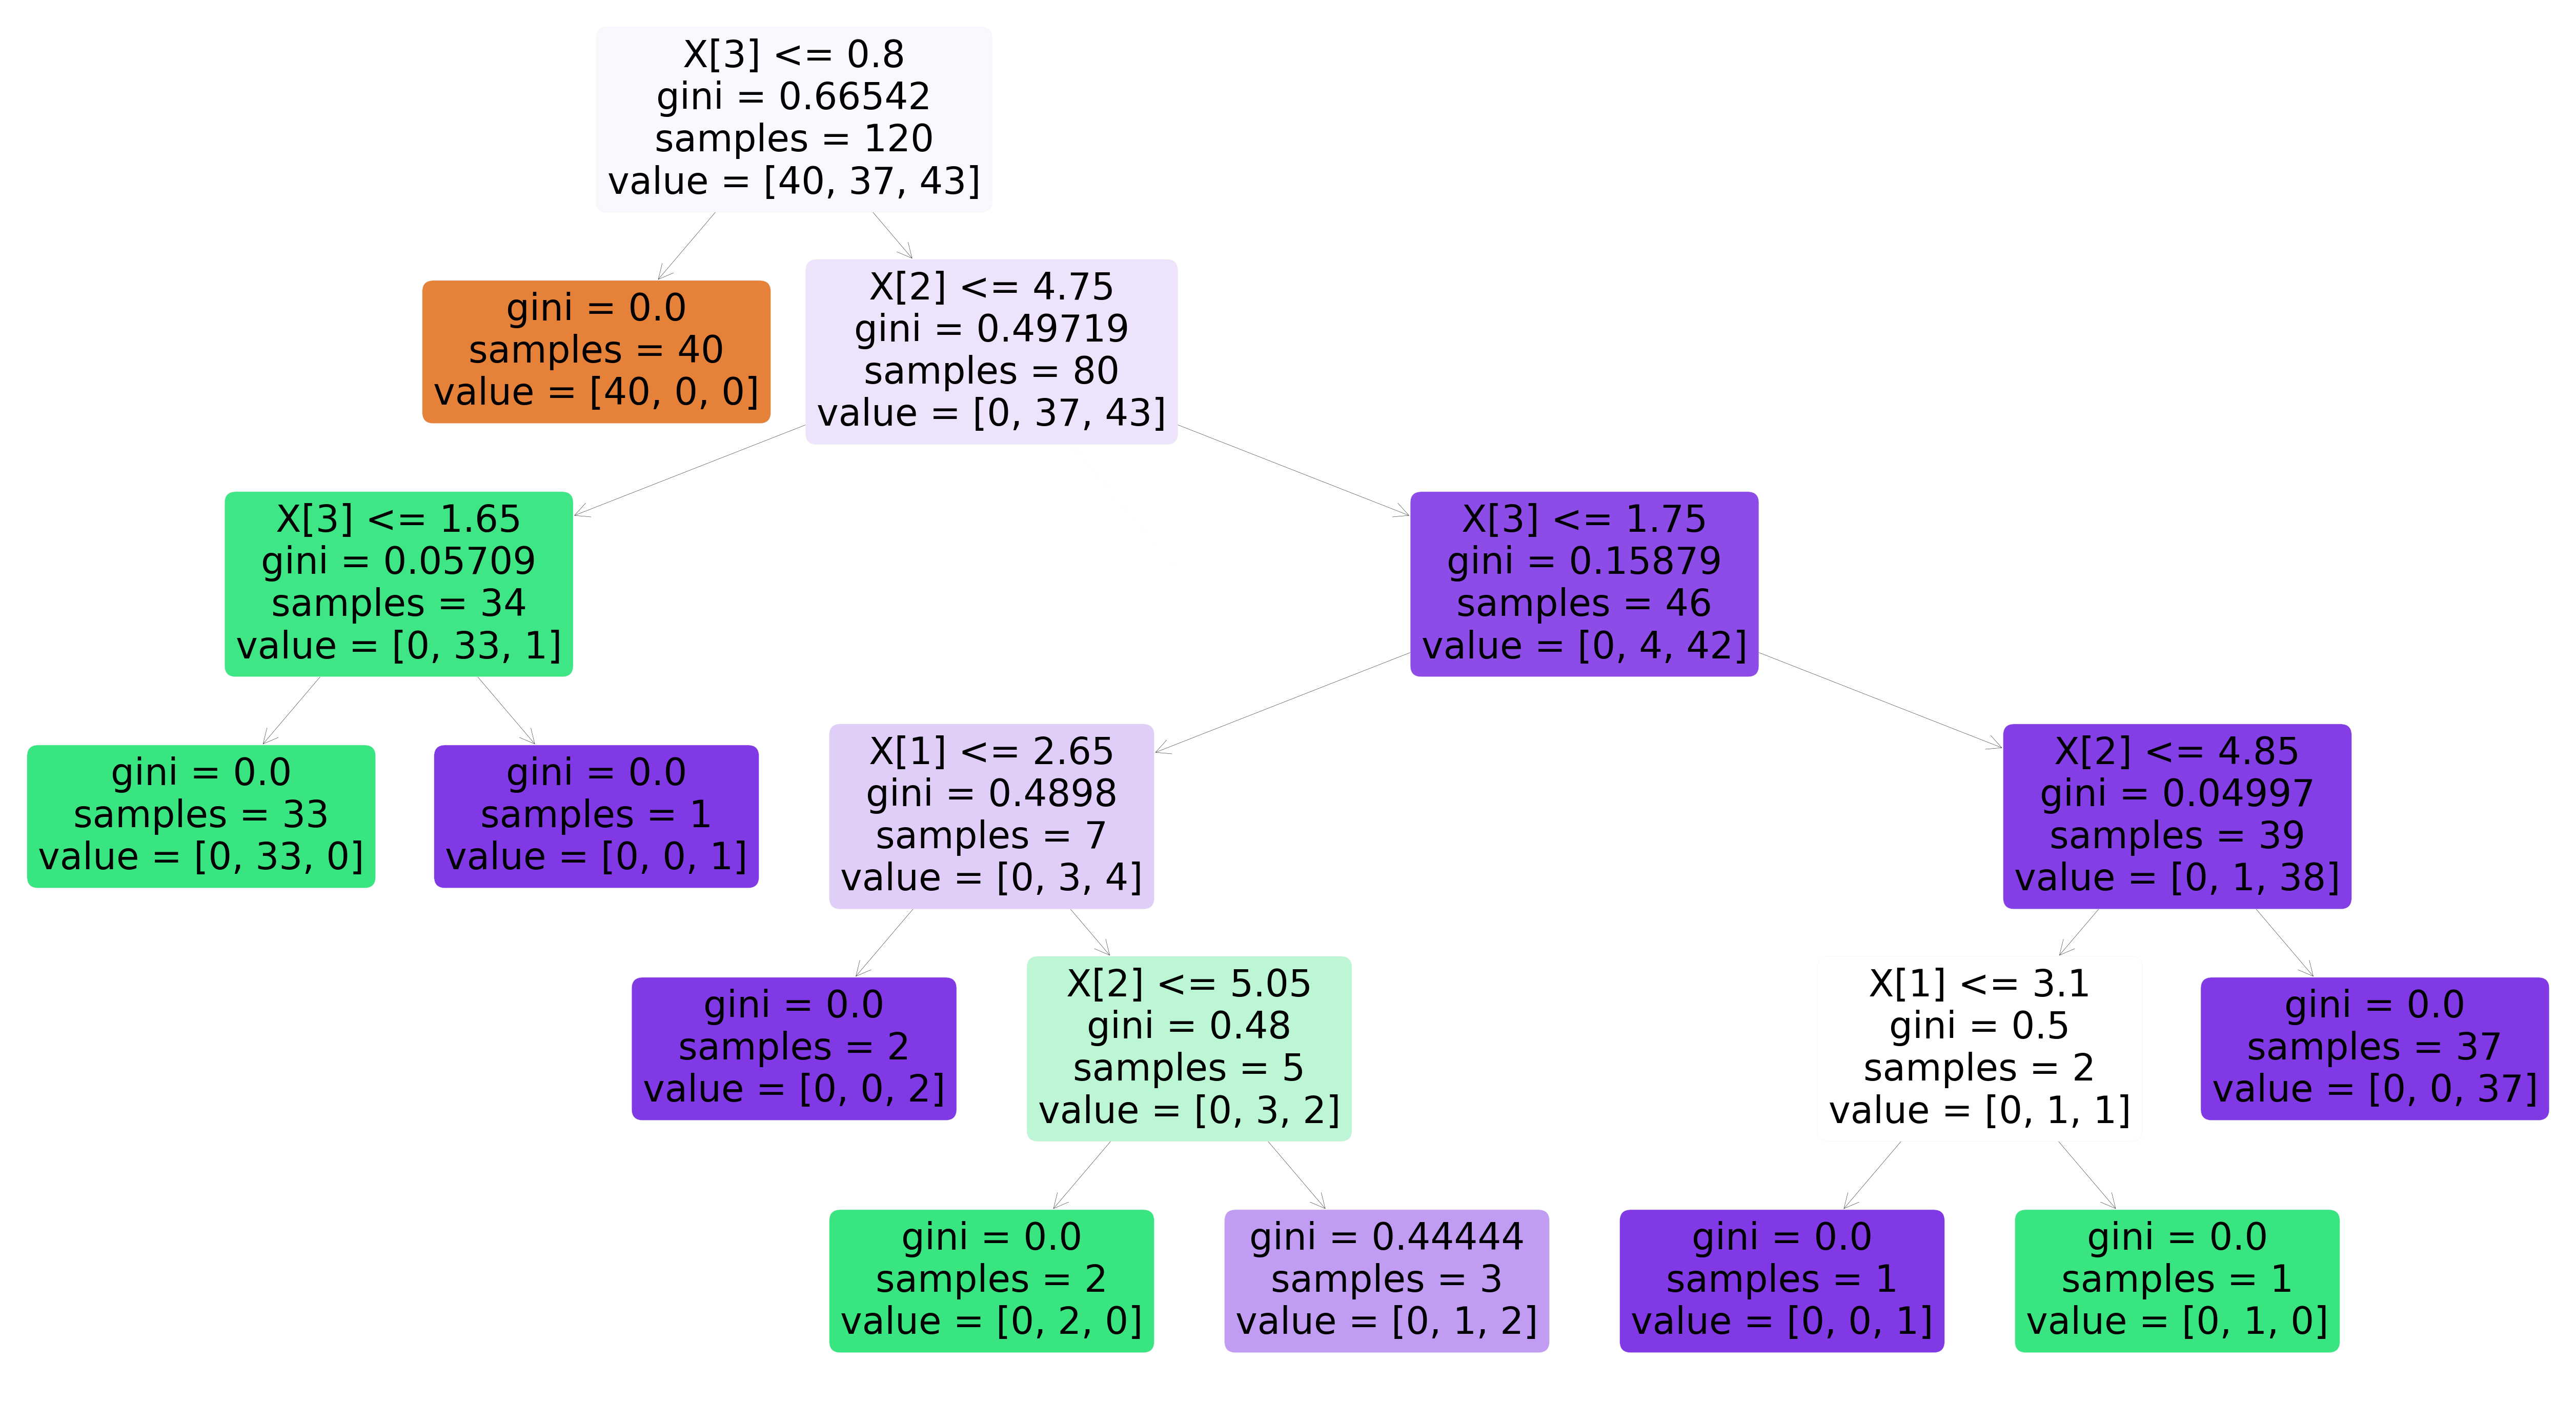

In [77]:
rcParams['figure.figsize'] = 80, 50
plot_tree(task6_clf,precision=5,rounded=True,filled=True);

Creating the above decision tree model maxdepth is use and this model doesn't overfit.
